In [1]:
import pandas as pd
import itertools
from sklearn.metrics import cohen_kappa_score
from scipy.stats import chi2_contingency
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

disagreement_type = "correct" #| together, individual, anti 
def get_cohens_kappa(df,vis_columns,remove_multi=False):
    cohenskappa_results = []

    # Pairwise comparisons
    for col1, col2 in itertools.combinations(vis_columns, 2):
        sub_df = df.copy()
        if remove_multi:
            sub_df = sub_df[sub_df.apply(lambda x: True if ("_" not in x[col1] and '_' not in x[col2]) else False, axis=1)]
        kappa = cohen_kappa_score(sub_df[col1],sub_df[col2])
        cohenskappa_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Cohen\'s Kappa': kappa
        })
    cohenskappa_results_df = pd.DataFrame(cohenskappa_results)
    return cohenskappa_results_df



def get_chisquare(df, vis_columns):
    chi2_results = []

    for col1, col2 in itertools.combinations(vis_columns, 2):
        # Drop NA values to avoid errors
        sub_df = df[[col1, col2]].dropna()

        # Create contingency table
        contingency = pd.crosstab(sub_df[col1], sub_df[col2])

        # Run Chi-Square test
        chi2, p, _, _ = chi2_contingency(contingency)

        chi2_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Chi2 Stat': chi2,
            'p-value': p
        })

    chi2_df = pd.DataFrame(chi2_results)
    return chi2_df.sort_values("p-value")
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrices_for_column_pairs(df, gt_col,vis_columns):

    n_pairs = len(vis_columns)

    # Determine layout: square-ish grid
    n_cols = int(np.ceil(np.sqrt(n_pairs)))
    n_rows = int(np.ceil(n_pairs / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    col1 = gt_col
    for idx, col2 in enumerate(vis_columns):
        ax = axes[idx]
        
        # Drop rows with missing values in either column
        sub_df = df[[col1, col2]].dropna().copy()
        start_length = len(sub_df)
        # sub_df = sub_df[sub_df.apply(lambda x: True if ("_" not in x[col1] and '_' not in x[col2]) else False, axis=1)]
        filter_length = len(sub_df)
        # Get confusion matrix
        labels = sorted(set(sub_df[col1]) | set(sub_df[col2]))
        cm = confusion_matrix(sub_df[col1], sub_df[col2], labels=labels)

        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(f"{col1} vs \n{col2}\n strt: {start_length}\nelim.:{filter_length-start_length}", fontsize=10)
        ax.set_xlabel(col2)
        ax.set_ylabel(col1)

    # Hide any extra axes
    for j in range(len(vis_columns), len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    return fig


Sleep
../exports/groundtruth/Annotated/Sleep_132_222_enriched.xlsx
Index(['UID', 'ROW_ID', 'Sent_ID', 'HADM_ID', 'CHARTTIME_dictionary',
       'STORETIME_dictionary', 'Sentence_dictionary', 'Event_Name_dictionary',
       'Keyword', 'Lemma', 'CGID_dictionary', 'Time_dictionary',
       'CHARTTIME_biolord', 'STORETIME_biolord', 'Sentence_biolord',
       'Event_Name_biolord', 'CGID_biolord', 'Similarity', 'Eating_similarity',
       'Excretion_similarity', 'Family_similarity', 'Pain_similarity',
       'Sleep_similarity', 'Time_biolord', 'Event_Name_dictionary_multi',
       'Event_Name_dictionary_bkp', 'Keyword_bkp', 'Lemma_bkp',
       'sampling_weight', 'is_keyword_present', 'gt_Sleep', 'good_example',
       'Comments'],
      dtype='object')
Keyword Stats:
is_keyword_present
False    222
True     132
Name: count, dtype: int64
After Grouping Sentences
is_keyword_present
False    221
True     131
Name: count, dtype: int64
After removing GT Unknown
is_keyword_present
False    221
Tru

{'f1': 0.9053497942386831,
 'acc': 0.9346590909090909,
 'prec': 0.8396946564885496,
 'rec': 0.9821428571428571}

*********All********
Number of True labels in y: 112
Number of False labels in y: 240
Train size: 281, Val size: 71
Train size: 281, Val size: 71
Train size: 282, Val size: 70
Train size: 282, Val size: 70
Train size: 282, Val size: 70


,threshold,f1,accuracy,precision,recall
0,0.402,0.714,0.831,0.750,0.682
1,0.399,0.606,0.817,0.714,0.526
2,0.440,0.667,0.814,0.812,0.565
3,0.504,0.385,0.771,0.833,0.250
4,0.504,0.474,0.714,0.900,0.321


Mean Metrics of K fold cross validation of Embedder


threshold   0.450
f1          0.569
accuracy    0.790
precision   0.802
recall      0.469
Name: mean, dtype: float64

{'positive': ['beginning of shift patient a&o. sleeping in naps', 'mobility: patient sat on side of bed..than was able to transfer to large wheelchair..however was unable to get self out of wheelchair this afternoon..patient was called and was able to get patient to stand and transfer to bed..has been sleeping rest of afternoon', "heart rate dropped to 50's when asleep, and diastolic blood pressure dropped to 80's -> a-paced at 70 then 80 bpm with sbp remaining in 80's -> neo re-started at 0.25mcg/kg-min with diastolic blood pressure rising to 90's", "resp--ls coarse/bronchial in bilat upper lobes, crackles 1/2 up bilat bases, no c/o sob, on ra sat down to 90%, o2 4l on w/sat up to 98% and down to 92-93% while sleeping, patient w/non prod, non congested cough, able to talk in full sentences w/out any c/o sob, rr 20-24, non labored, patient given 40mg iv lasix for crackles/decreased sat and decreased u/o w/lg diuresis, u/o has con't ~40cc/heart rate during noc", 'slept in long naps over

,threshold,f1,accuracy,precision,recall
0,0.093,0.909,0.841,0.854,0.972
1,0.074,0.949,0.909,0.925,0.974
2,0.095,0.919,0.860,0.895,0.944


Mean Metrics of K fold cross validation of Embedder


threshold   0.088
f1          0.926
accuracy    0.870
precision   0.891
recall      0.963
Name: mean, dtype: float64

*********Without Keyword********
Number of True labels in y: 2
Number of False labels in y: 219
Train size: 147, Val size: 74
Train size: 147, Val size: 74
Train size: 148, Val size: 73


/home/asusaiyah/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,threshold,f1,accuracy,precision,recall
0,0.302,0.167,0.865,0.091,1.000
1,0.564,0.000,0.959,0.000,0.000
2,0.566,0.000,0.959,0.000,0.000


Mean Metrics of K fold cross validation of Embedder


threshold   0.477
f1          0.056
accuracy    0.928
precision   0.030
recall      0.333
Name: mean, dtype: float64

proportion of disagreement - dictionary, embedder 0.05397727272727273
Excretion
../exports/groundtruth/Annotated/Excretion_97_230.xlsx
Index(['UID', 'ROW_ID', 'Sent_ID', 'HADM_ID', 'CHARTTIME_dictionary',
       'STORETIME_dictionary', 'Sentence_dictionary', 'Event_Name_dictionary',
       'Keyword', 'Lemma', 'CGID_dictionary', 'Time_dictionary',
       'CHARTTIME_biolord', 'STORETIME_biolord', 'Sentence_biolord',
       'Event_Name_biolord', 'CGID_biolord', 'Similarity', 'Eating_similarity',
       'Excretion_similarity', 'Family_similarity', 'Pain_similarity',
       'Sleep_similarity', 'Time_biolord', 'Event_Name_dictionary_multi',
       'Event_Name_dictionary_bkp', 'Keyword_bkp', 'Lemma_bkp',
       'sampling_weight', 'is_keyword_present', 'gt_Excretion',
       'good_example'],
      dtype='object')
Keyword Stats:
is_keyword_present
False    230
True      97
Name: count, dtype: int64
After Grouping Sentences
is_keyword_present
False    229
True      96
Name: count, dtype: int64
A

{'f1': 0.6352941176470588,
 'acc': 0.8092307692307692,
 'prec': 0.5625,
 'rec': 0.7297297297297297}

*********All********
Number of True labels in y: 74
Number of False labels in y: 251
Train size: 260, Val size: 65
Train size: 260, Val size: 65
Train size: 260, Val size: 65
Train size: 260, Val size: 65
Train size: 260, Val size: 65


,threshold,f1,accuracy,precision,recall
0,0.339,0.500,0.815,0.857,0.353
1,0.316,0.522,0.831,0.600,0.462
2,0.343,0.421,0.831,1.000,0.267
3,0.310,0.526,0.862,0.833,0.385
4,0.343,0.348,0.769,0.571,0.250


Mean Metrics of K fold cross validation of Embedder


threshold   0.330
f1          0.463
accuracy    0.822
precision   0.772
recall      0.343
Name: mean, dtype: float64

{'positive': ["resp--ls coarse/bronchial in bilat upper lobes, crackles 1/2 up bilat bases, no c/o sob, on ra sat down to 90%, o2 4l on w/sat up to 98% and down to 92-93% while sleeping, patient w/non prod, non congested cough, able to talk in full sentences w/out any c/o sob, rr 20-24, non labored, patient given 40mg iv lasix for crackles/decreased sat and decreased u/o w/lg diuresis, u/o has con't ~40cc/heart rate during noc", 'foley to drainage in place for evening diuresis from previous shift lasix, >1l response, neg. 1400cc at mn', 'able to void in urinal at 0400 150cc, then with large incontinence when missed urinal', 'alt in elimination: u/o=27-180cc/h foul smelling amber urine', 'blood and urine cultures sent, cxr done patient started on levofloxicin', 'no incontinence of urine or stool during "seizure activity"', '[**7-2**] where she had a witnesses 15-second tonic-clonic seizure at the end of her hd treatment (+ incontinence)', 'tylenol given and bc x 2 and urine sent', 'gu: 

/tmp/ipykernel_2711889/2600172955.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Train size: 64, Val size: 32


,threshold,f1,accuracy,precision,recall
0,0.060,0.783,0.688,0.667,0.947
1,0.054,0.750,0.688,0.652,0.882
2,0.079,0.667,0.562,0.583,0.778


Mean Metrics of K fold cross validation of Embedder


threshold   0.064
f1          0.733
accuracy    0.646
precision   0.634
recall      0.869
Name: mean, dtype: float64

*********Without Keyword********
Number of True labels in y: 20
Number of False labels in y: 209
Train size: 152, Val size: 77
Train size: 153, Val size: 76
Train size: 153, Val size: 76


,threshold,f1,accuracy,precision,recall
0,0.343,0.833,0.974,0.833,0.833
1,0.480,0.364,0.908,0.667,0.250
2,0.496,0.000,0.921,0.000,0.000


Mean Metrics of K fold cross validation of Embedder


threshold   0.440
f1          0.399
accuracy    0.934
precision   0.500
recall      0.361
Name: mean, dtype: float64

proportion of disagreement - dictionary, embedder 0.09538461538461539


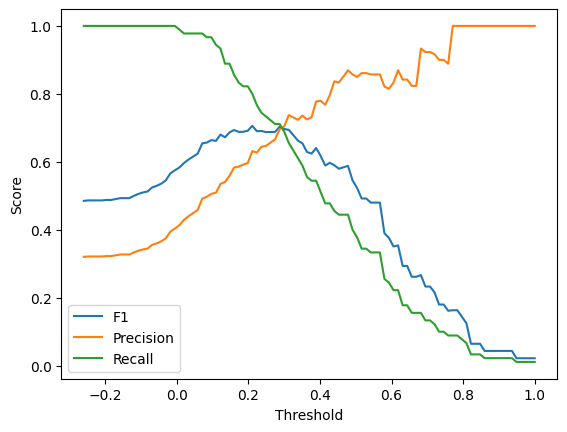

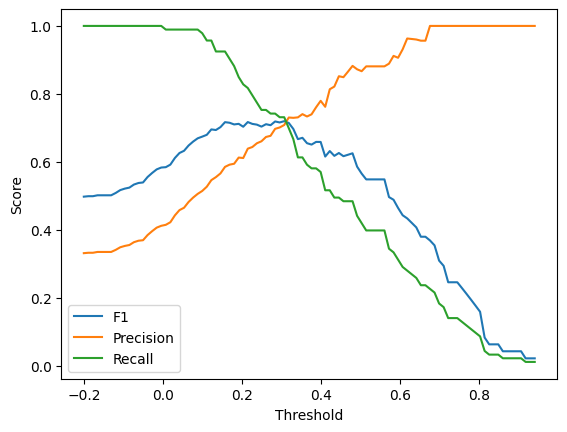

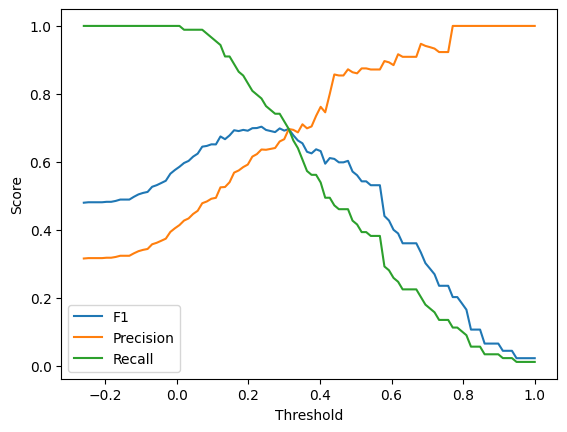

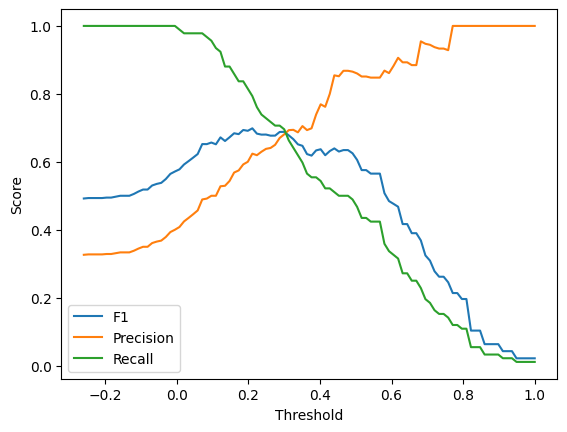

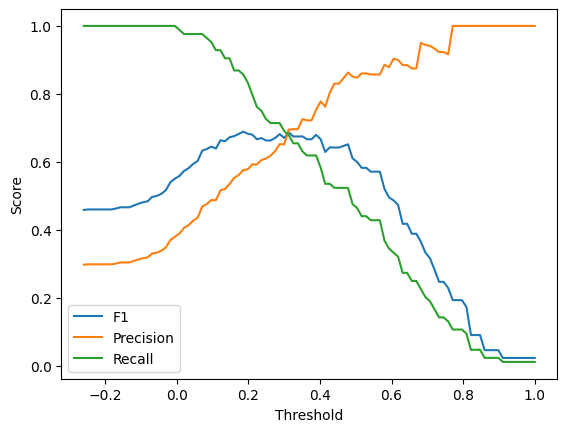

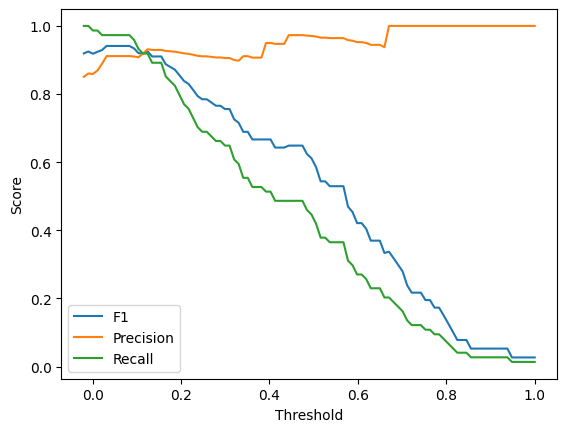

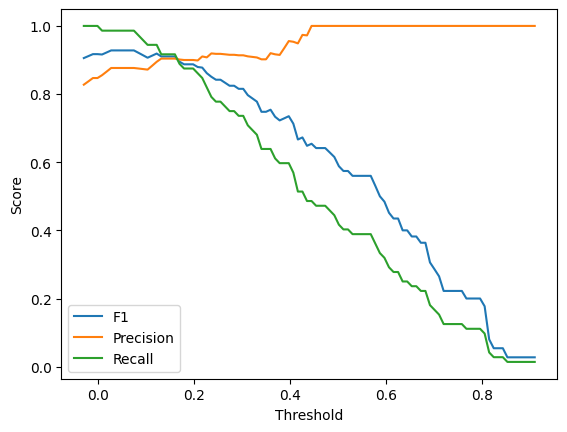

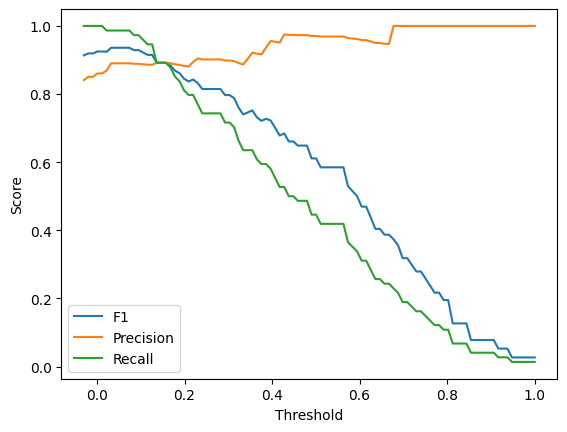

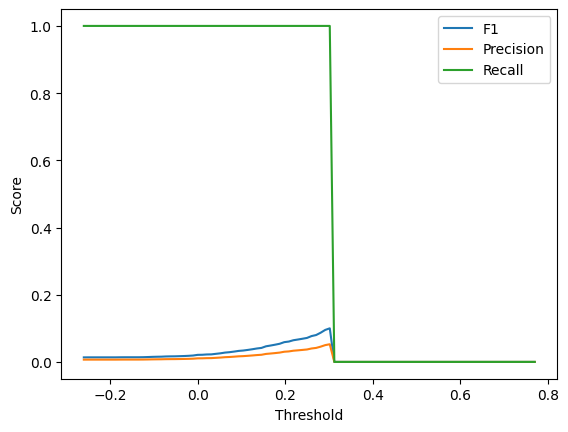

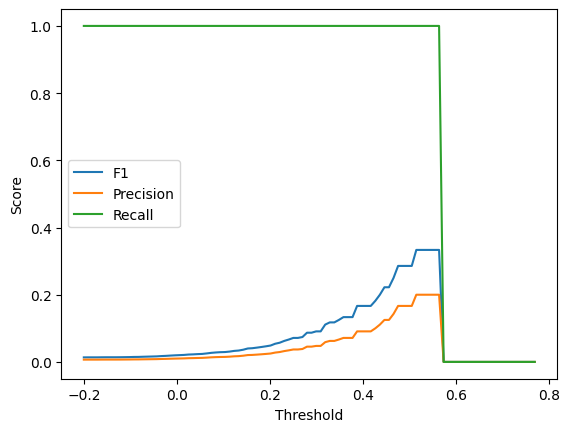

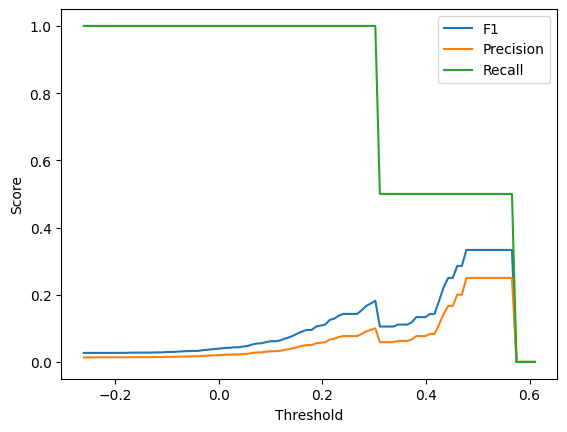

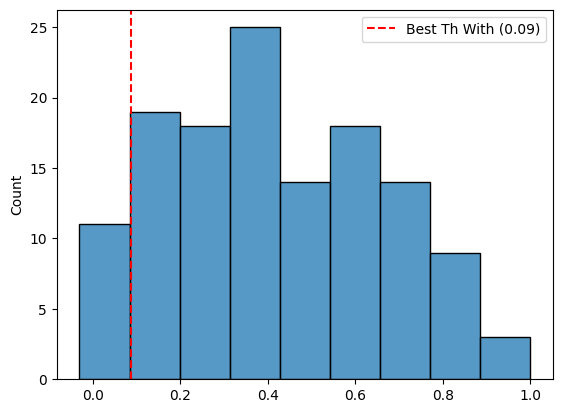

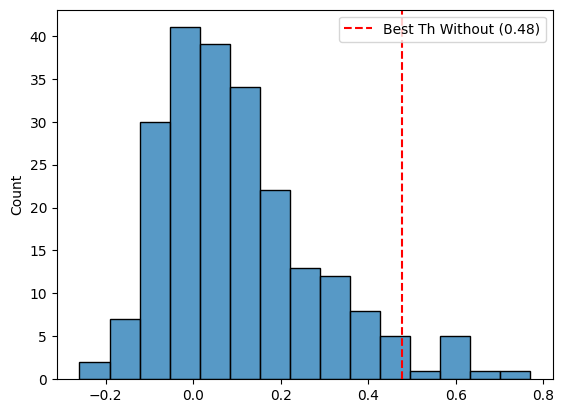

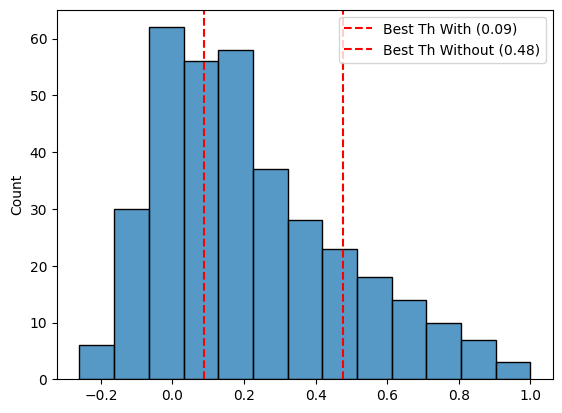

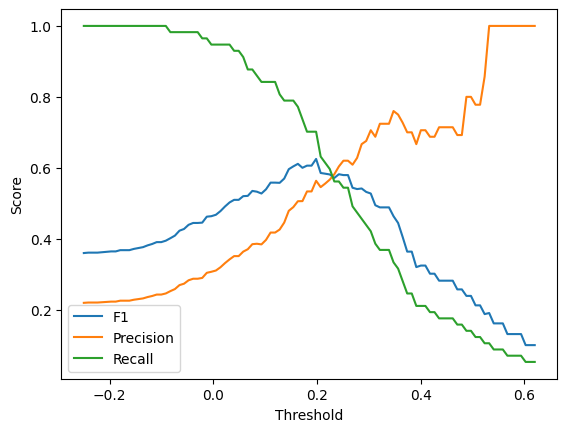

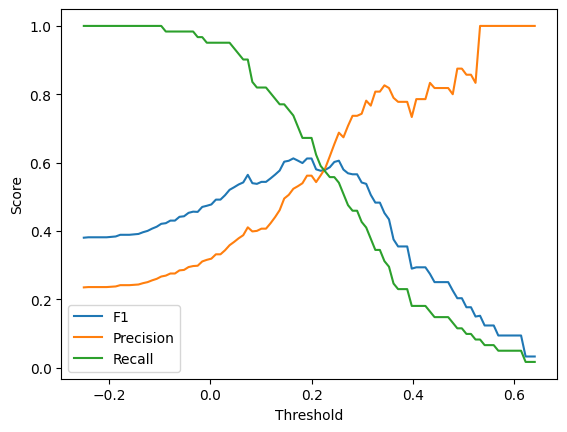

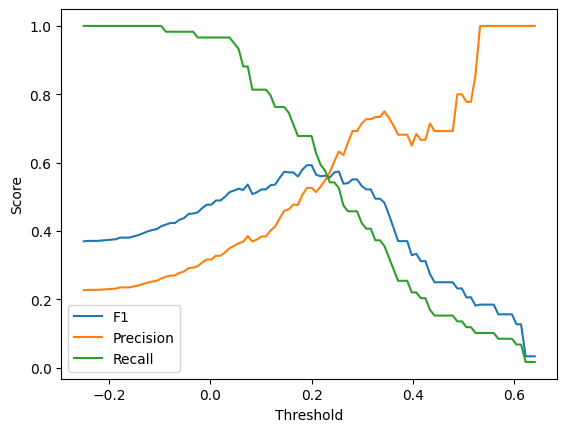

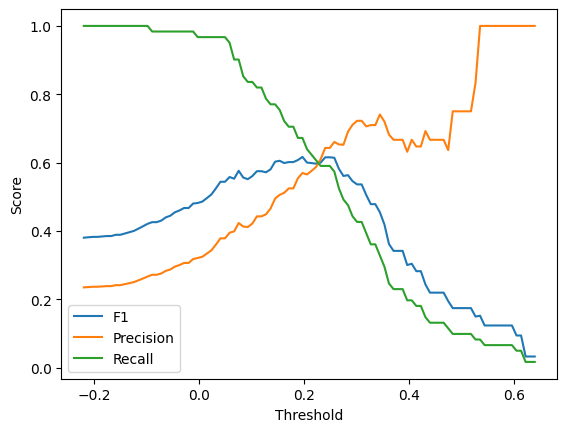

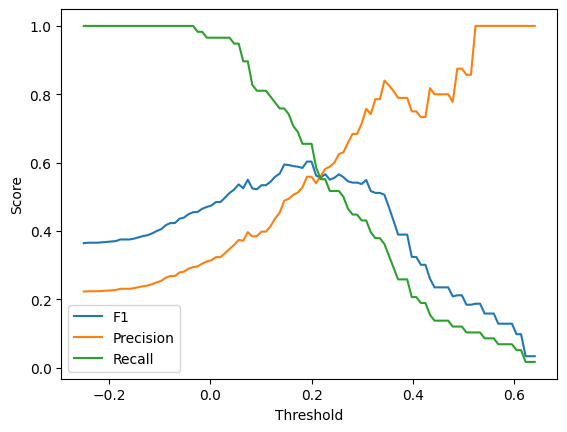

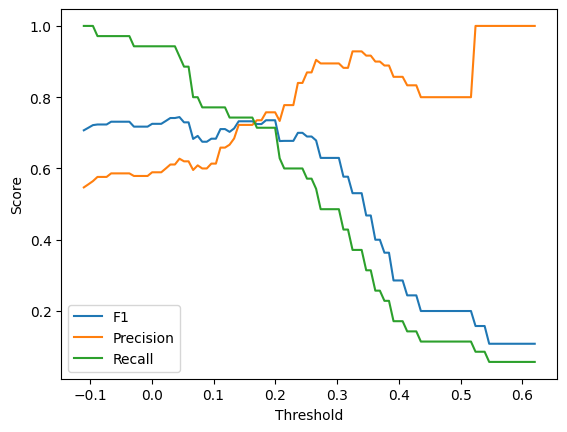

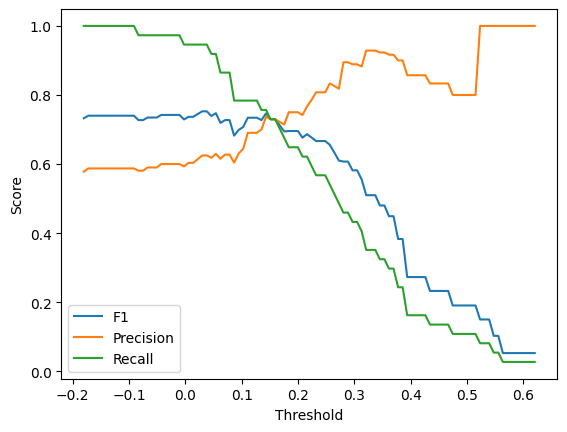

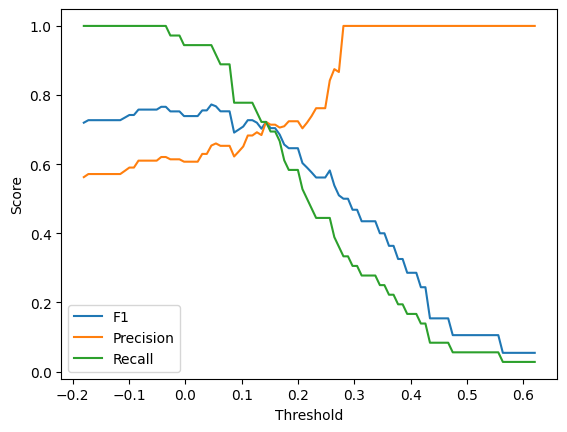

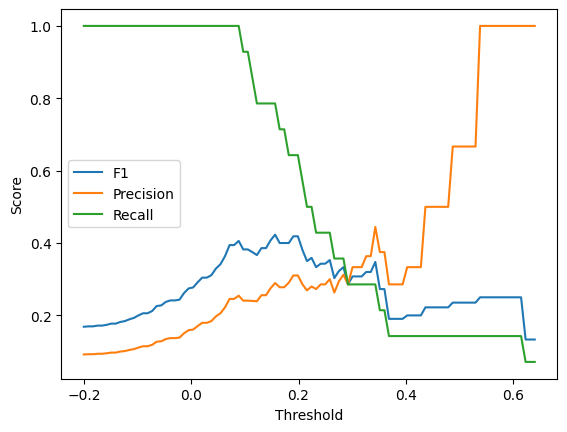

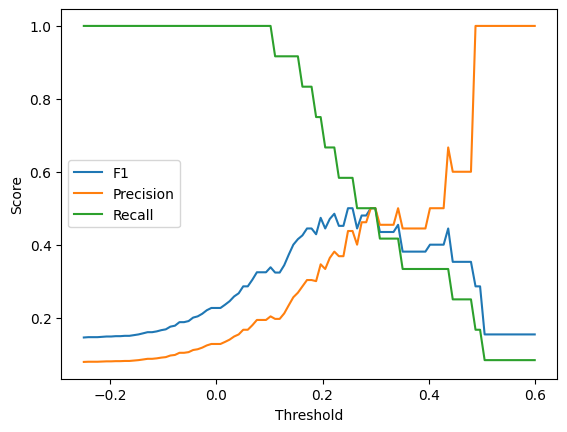

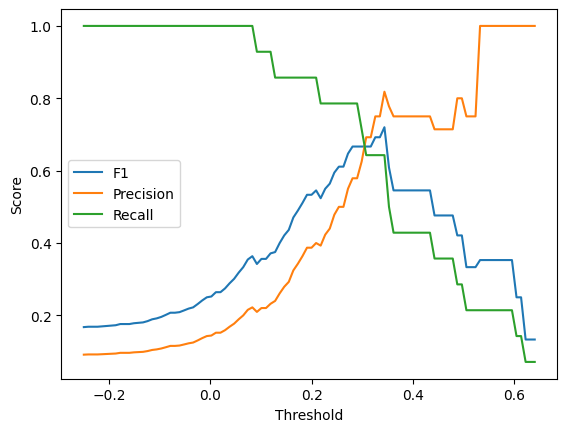

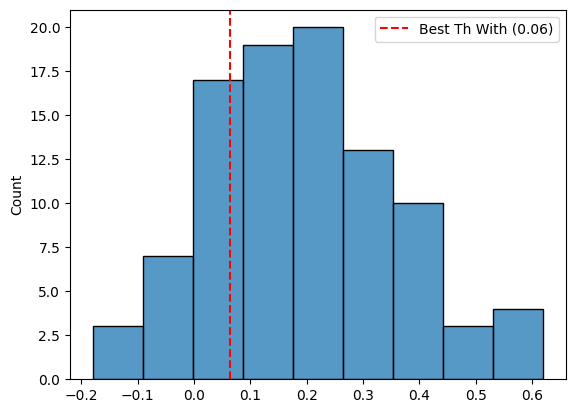

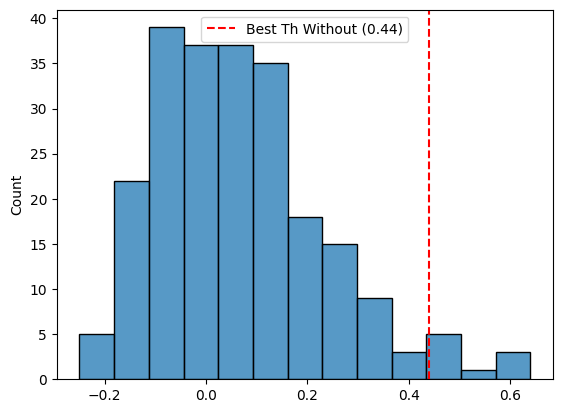

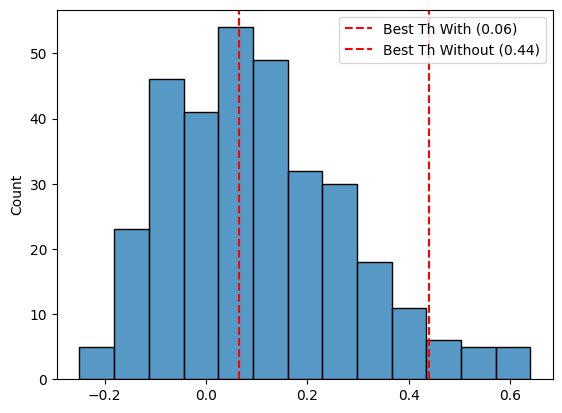

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from IPython.display import display
import random
random.seed(42)
from glob import glob
# Load your data
result_dict = {}

def train_model(X,y):
    results = []
    f1s, accs, precs, recs = [], [], [], []
    # Thresholds to test
    thresholds = np.linspace(min(X), max(X), 100)
    for threshold in thresholds:
        preds = (X >= threshold).astype(int)
        f1s.append(f1_score(y, preds))
        accs.append(accuracy_score(y, preds))
        precs.append(precision_score(y, preds, zero_division=0))
        recs.append(recall_score(y, preds))
        results.append({
            "threshold": threshold,
            "f1": np.mean(f1s),
            "accuracy": np.mean(accs),
            "precision": np.mean(precs),
            "recall": np.mean(recs)
        })
    # Convert results to DataFrame
    plt.figure()
    plt.plot(thresholds, f1s, label='F1')
    plt.plot(thresholds, precs, label='Precision')
    plt.plot(thresholds, recs, label='Recall')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    results_df = pd.DataFrame(results)
    # Find the best threshold by F1 (or any other metric)
    best = results_df.loc[results_df["f1"].idxmax()]
    return best["threshold"]


def get_kfcv_results(X,y,label,K=5):
    print(label)
    print(f"Number of True labels in y: {np.sum(y == 1)}")
    print(f"Number of False labels in y: {np.sum(y == 0)}")
    kf = KFold(n_splits=K, shuffle=True, random_state=42)
    th_val, f1s_val, accs_val, precs_val, recs_val = [], [], [], [], []
    for train_idx, val_idx in kf.split(X):
        print(f"Train size: {len(train_idx)}, Val size: {len(val_idx)}")
        X_train = X[train_idx]
        y_train = y[train_idx]

        best_threshold = train_model(X_train,y_train)
        X_val = X[val_idx]
        y_val = y[val_idx]
        preds = (X_val >= best_threshold).astype(int)
        th_val.append(best_threshold)
        f1s_val.append(f1_score(y_val, preds))
        accs_val.append(accuracy_score(y_val, preds))
        precs_val.append(precision_score(y_val, preds, zero_division=0))
        recs_val.append(recall_score(y_val, preds))
    # Convert results to DataFrame
    results_df = pd.DataFrame({
        "threshold": th_val,
        "f1": f1s_val,
        "accuracy": accs_val,
        "precision": precs_val,
        "recall": recs_val
    })
    
    display(results_df)
    print("Mean Metrics of K fold cross validation of Embedder")
    display(results_df.describe().loc['mean'])
    best_th = results_df.describe().loc['mean']['threshold']
    return best_th



    
for ET in ["Sleep","Excretion"]:
    print(ET)
    if ET not in result_dict:
        result_dict[ET] = {}
    file_path = glob(f"../exports/groundtruth/Annotated/{ET}*.xlsx")[0]
    print(file_path)
    df = pd.read_excel(file_path)  # or however you load it
    print(df.columns)
    print("Keyword Stats:")
    print(df.is_keyword_present.value_counts())
    
    
    df = df.groupby("UID")[[f"{ET}_similarity", f"gt_{ET}", "is_keyword_present", "Sentence_dictionary","Lemma"]].agg(lambda x: max(x) if len(set(x))>1 else set(x).pop()).reset_index()
    
    print("After Grouping Sentences")
    print(df.is_keyword_present.value_counts())
    df.dropna(subset=f"gt_{ET}",inplace=True)
    print("After removing GT Unknown")
    print(df.is_keyword_present.value_counts())
    print(len(df))
    X = df[f"{ET}_similarity"].values
    y = df[f"gt_{ET}"].values.astype(int)
    y_dict = df.is_keyword_present.values

    print("Metrics of dictionary")
    display({"f1":f1_score(y, y_dict), "acc":accuracy_score(y, y_dict), 
    "prec":precision_score(y, y_dict, zero_division=0), "rec":recall_score(y, y_dict.astype(int))})

    X_all = X.copy()
    y_all = y.copy()
    
    # th_all = train_model(X_all,y_all)
    # preds = (X_all >= th_all).astype(int)
    # print("th",(th_all),"f1",(f1_score(y_all, preds)), "acc",accuracy_score(y_all, preds), "prec",precision_score(y_all, preds, zero_division=0),"rec", recall_score(y_all, preds))
    
    best_th_all = get_kfcv_results(X_all, y_all, label = "*********All********", K=5)
    sentences_by_label = {
        "positive": df.loc[(df[f"gt_{ET}"] == 1) & (df[f"{ET}_similarity"]<best_th_all), "Sentence_dictionary"].tolist(),
        "negative": df.loc[(df[f"gt_{ET}"] == 0) & (df[f"{ET}_similarity"]>=best_th_all), "Sentence_dictionary"].tolist()
        }
    print(sentences_by_label)
    tpr = df.groupby(['is_keyword_present','Lemma'])[f"gt_{ET}"].mean().reset_index()
    keyword_present_tpr = tpr[tpr.is_keyword_present == 1]
    keyword_absent_tpr = tpr[(tpr.is_keyword_present == 0) & (tpr[f"gt_{ET}"]>0)]
    print(keyword_present_tpr, keyword_absent_tpr)
    kw_mask = (df.is_keyword_present == True)
    best_th_with = get_kfcv_results(X_all[kw_mask], y_all[kw_mask], label = "*********With Keyword********", K=3)
    best_th_without = get_kfcv_results(X_all[~kw_mask], y_all[~kw_mask], label = "*********Without Keyword********", K=3)   

    mixed_mask = ((X_all<best_th_with) | (X_all>=best_th_without))
    agg_mask = (((X_all < best_th_without) & (~kw_mask) ) | ((X_all>=best_th_with) & (kw_mask)))
    disagg_mask = (((X_all < best_th_with) & kw_mask ) | ((X_all>=best_th_without) & (~kw_mask)))

    agg_mask = (((X_all < best_th_without) & (~kw_mask) ) | ((X_all>=best_th_with) & (kw_mask)))
    plt.figure()
    sns.histplot(X_all[kw_mask])
    plt.axvline(x=best_th_with, color='red', linestyle='--', label=f'Best Th With ({best_th_with:.2f})')
    plt.legend()
    plt.figure()
    sns.histplot(X_all[~kw_mask])
    plt.axvline(x=best_th_without, color='red', linestyle='--', label=f'Best Th Without ({best_th_without:.2f})')
    plt.legend()
    plt.figure()
    sns.histplot(X_all)
    plt.axvline(x=best_th_with, color='red', linestyle='--', label=f'Best Th With ({best_th_with:.2f})')
    plt.legend()
    plt.axvline(x=best_th_without, color='red', linestyle='--', label=f'Best Th Without ({best_th_without:.2f})')
    plt.legend()
    
    result_dict[ET]['th_all'] = best_th_all 
    result_dict[ET]['th_with'] = best_th_with
    result_dict[ET]['th_without'] = best_th_without
    result_dict[ET]['disagreement_mask'] = disagg_mask
    result_dict[ET]['agreement_mask'] = agg_mask
    result_dict[ET]['mixed_mask'] = mixed_mask
    result_dict[ET]['disagreement_uid'] = df[disagg_mask]["UID"].tolist()  
    result_dict[ET]['agreement_uid'] = df[agg_mask]["UID"].tolist()   
    result_dict[ET]['mixed_uid'] = df[mixed_mask]["UID"].tolist()  
    print("proportion of disagreement - dictionary, embedder",result_dict[ET]['disagreement_mask'].mean())    

In [3]:
df.columns

Index(['UID', 'Excretion_similarity', 'gt_Excretion', 'is_keyword_present',
       'Sentence_dictionary', 'Lemma'],
      dtype='object')

********************Sleep************************
Sleep_132_222_kw_False_phrase_False
 False False Sleep_132_222_kw_False_phrase_False


is_keyword_present
False    127
True      65
Name: count, dtype: int64

GT_Sleep  is_keyword_present
0         False                 126
1         True                   56
0         True                    9
1         False                   1
Name: count, dtype: int64
file written to ../exports/disagreements/Sleep/mixed_correct_Sleep_132_222_kw_False_phrase_False.xlsx


/tmp/ipykernel_2711889/3945835033.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_with)]['dict-embedder-status'] = "TT"
/tmp/ipykernel_2711889/3945835033.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_with)]['dict-embedder-status'] = "TF"
/tmp/ipykernel_2711889/3945835033.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,technique,pos_sup,neg_sup,f1_score,precision,recall,time
0,dictionary,57,135,0.918,0.862,0.982,0.002
1,LLM_,57,135,0.915,0.885,0.947,4.221
2,LLM__Ki,57,135,0.923,0.900,0.947,4.193
3,LLM__Si,57,135,0.915,0.885,0.947,4.321
4,LLM_KiSi,57,135,0.915,0.885,0.947,4.471


Sleep_132_222_kw_False_phrase_True
Qo False True Sleep_132_222_kw_False_phrase_True


is_keyword_present
False    127
True      65
Name: count, dtype: int64

GT_Sleep  is_keyword_present
0         False                 126
1         True                   56
0         True                    9
1         False                   1
Name: count, dtype: int64
file written to ../exports/disagreements/Sleep/mixed_correct_Sleep_132_222_kw_False_phrase_True.xlsx


/tmp/ipykernel_2711889/3945835033.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_with)]['dict-embedder-status'] = "TT"
/tmp/ipykernel_2711889/3945835033.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_with)]['dict-embedder-status'] = "TF"
/tmp/ipykernel_2711889/3945835033.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,technique,pos_sup,neg_sup,f1_score,precision,recall,time
0,dictionaryQo,57,135,0.918,0.862,0.982,0.002
1,LLM_Qo,57,135,0.915,0.885,0.947,15.135
2,LLM__KiQo,57,135,0.924,0.887,0.965,10.944
3,LLM__SiQo,57,135,0.915,0.885,0.947,4.426
4,LLM_KiSiQo,57,135,0.915,0.885,0.947,4.496


Sleep_132_222_kw_True_phrase_False
Ko True False Sleep_132_222_kw_True_phrase_False


is_keyword_present
False    127
True      65
Name: count, dtype: int64

GT_Sleep  is_keyword_present
0         False                 126
1         True                   56
0         True                    9
1         False                   1
Name: count, dtype: int64
file written to ../exports/disagreements/Sleep/mixed_correct_Sleep_132_222_kw_True_phrase_False.xlsx


/tmp/ipykernel_2711889/3945835033.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_with)]['dict-embedder-status'] = "TT"
/tmp/ipykernel_2711889/3945835033.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_with)]['dict-embedder-status'] = "TF"
/tmp/ipykernel_2711889/3945835033.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,technique,pos_sup,neg_sup,f1_score,precision,recall,time
0,dictionaryKo,57,135,0.918,0.862,0.982,0.002
1,LLM_Ko,57,135,0.933,0.889,0.982,12.433
2,LLM__KiKo,57,135,0.924,0.887,0.965,8.015
3,LLM__SiKo,57,135,0.915,0.885,0.947,4.227
4,LLM_KiSiKo,57,135,0.915,0.885,0.947,4.334


Sleep_132_222_kw_True_phrase_True
KoQo True True Sleep_132_222_kw_True_phrase_True


is_keyword_present
False    127
True      65
Name: count, dtype: int64

GT_Sleep  is_keyword_present
0         False                 126
1         True                   56
0         True                    9
1         False                   1
Name: count, dtype: int64
file written to ../exports/disagreements/Sleep/mixed_correct_Sleep_132_222_kw_True_phrase_True.xlsx


/tmp/ipykernel_2711889/3945835033.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_with)]['dict-embedder-status'] = "TT"
/tmp/ipykernel_2711889/3945835033.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_with)]['dict-embedder-status'] = "TF"
/tmp/ipykernel_2711889/3945835033.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,technique,pos_sup,neg_sup,f1_score,precision,recall,time
0,dictionaryKoQo,57,135,0.918,0.862,0.982,0.002
1,LLM_KoQo,57,135,0.897,0.881,0.912,23.462
2,LLM__KiKoQo,57,135,0.915,0.885,0.947,21.767
3,LLM__SiKoQo,57,135,0.915,0.885,0.947,4.255
4,LLM_KiSiKoQo,57,135,0.915,0.885,0.947,4.326


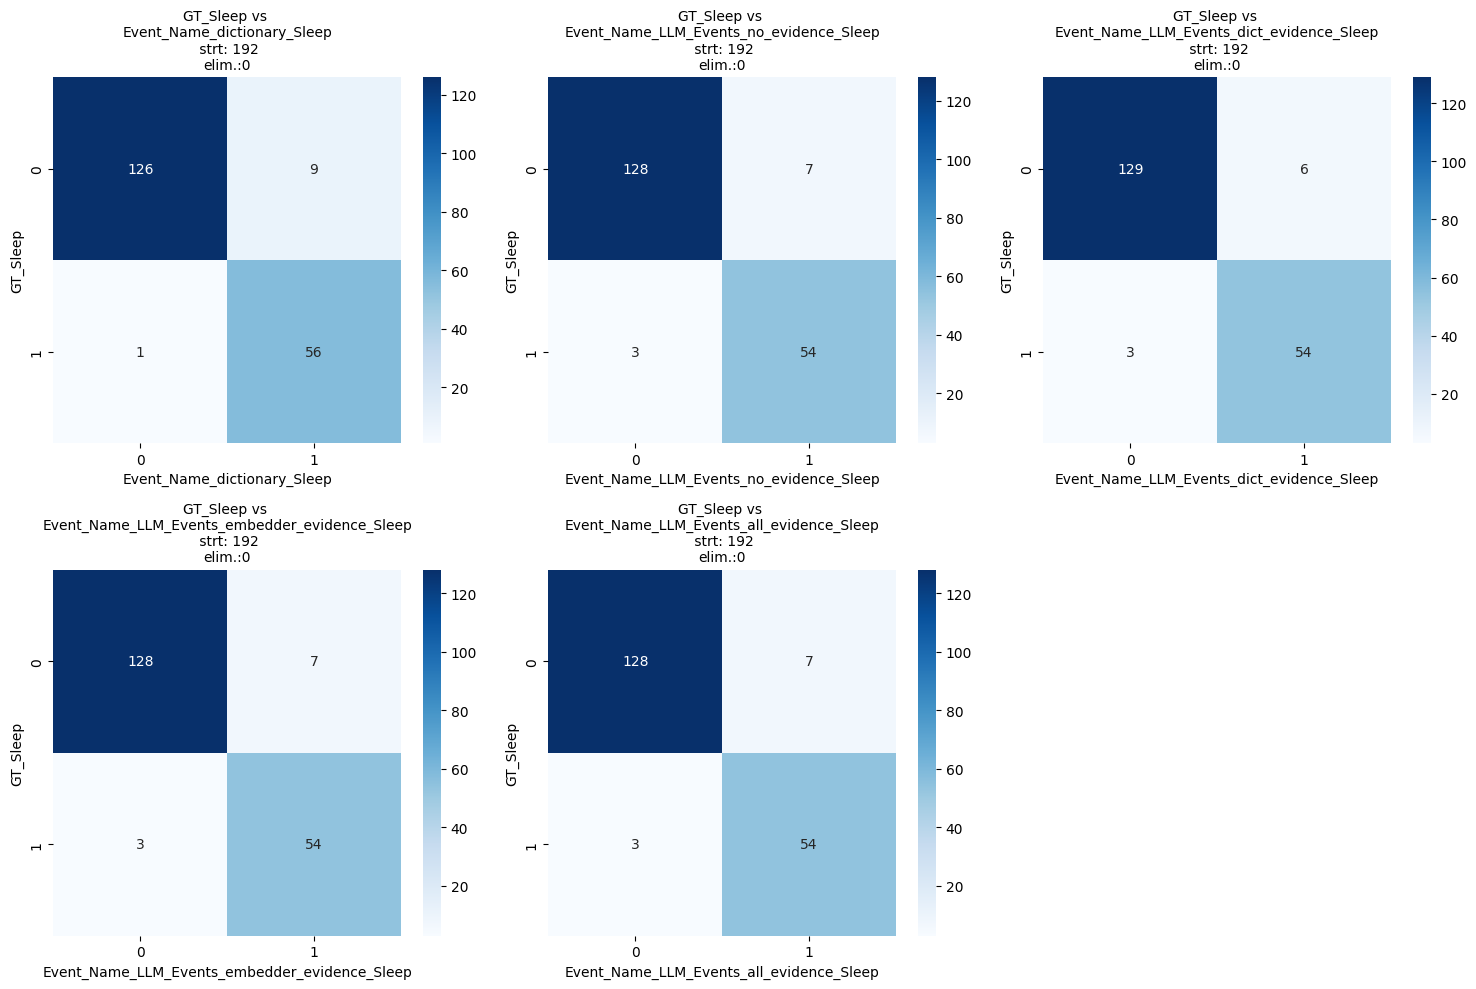

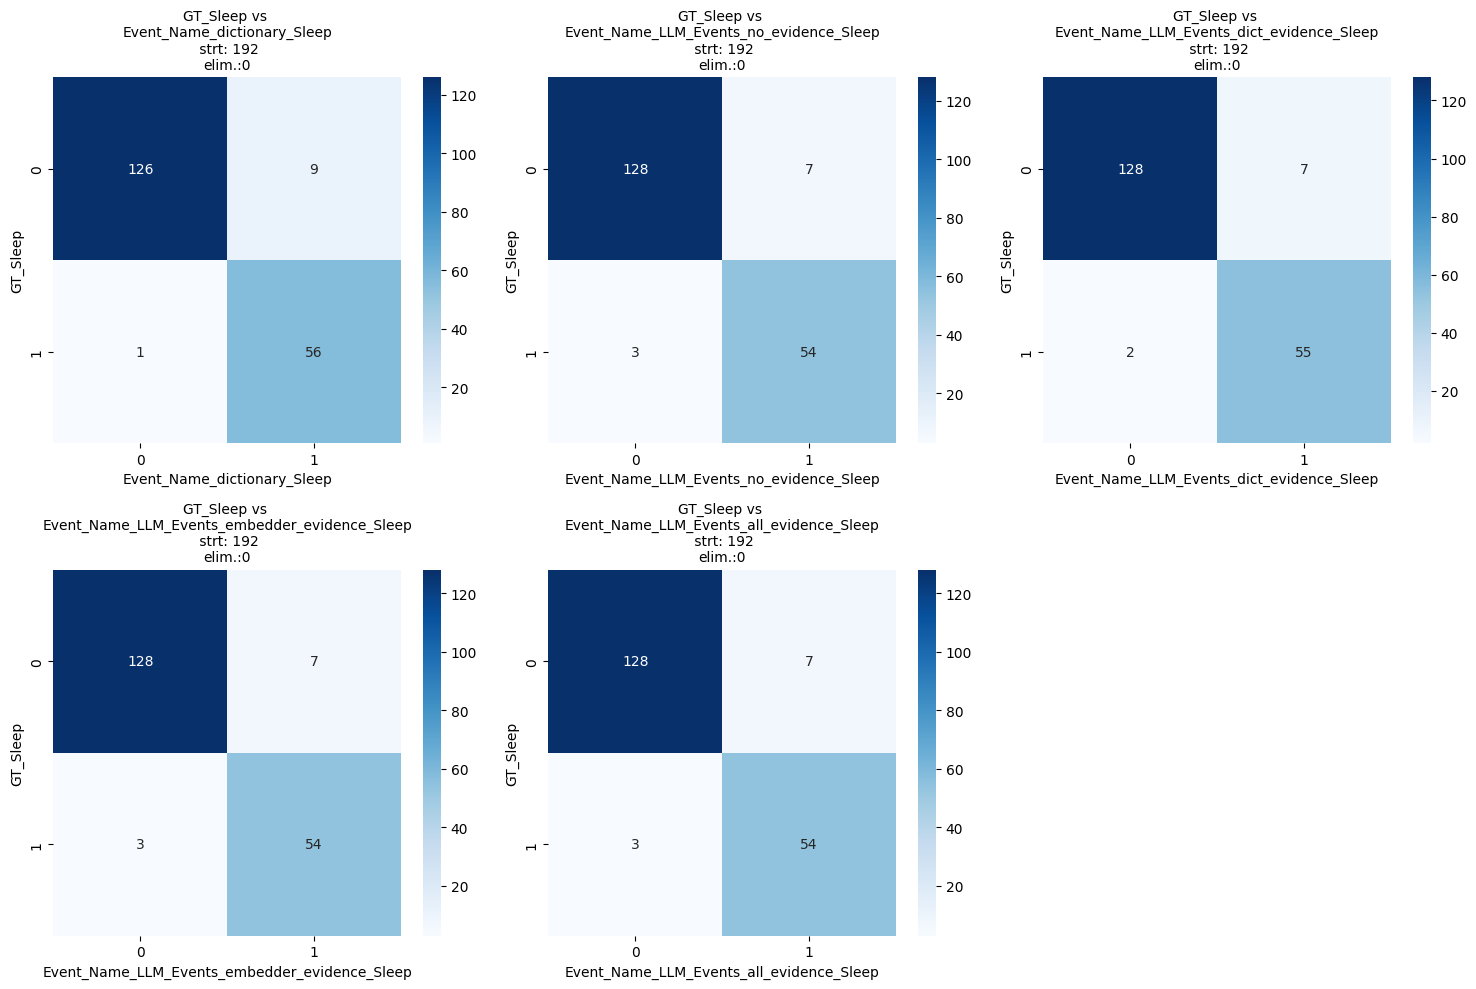

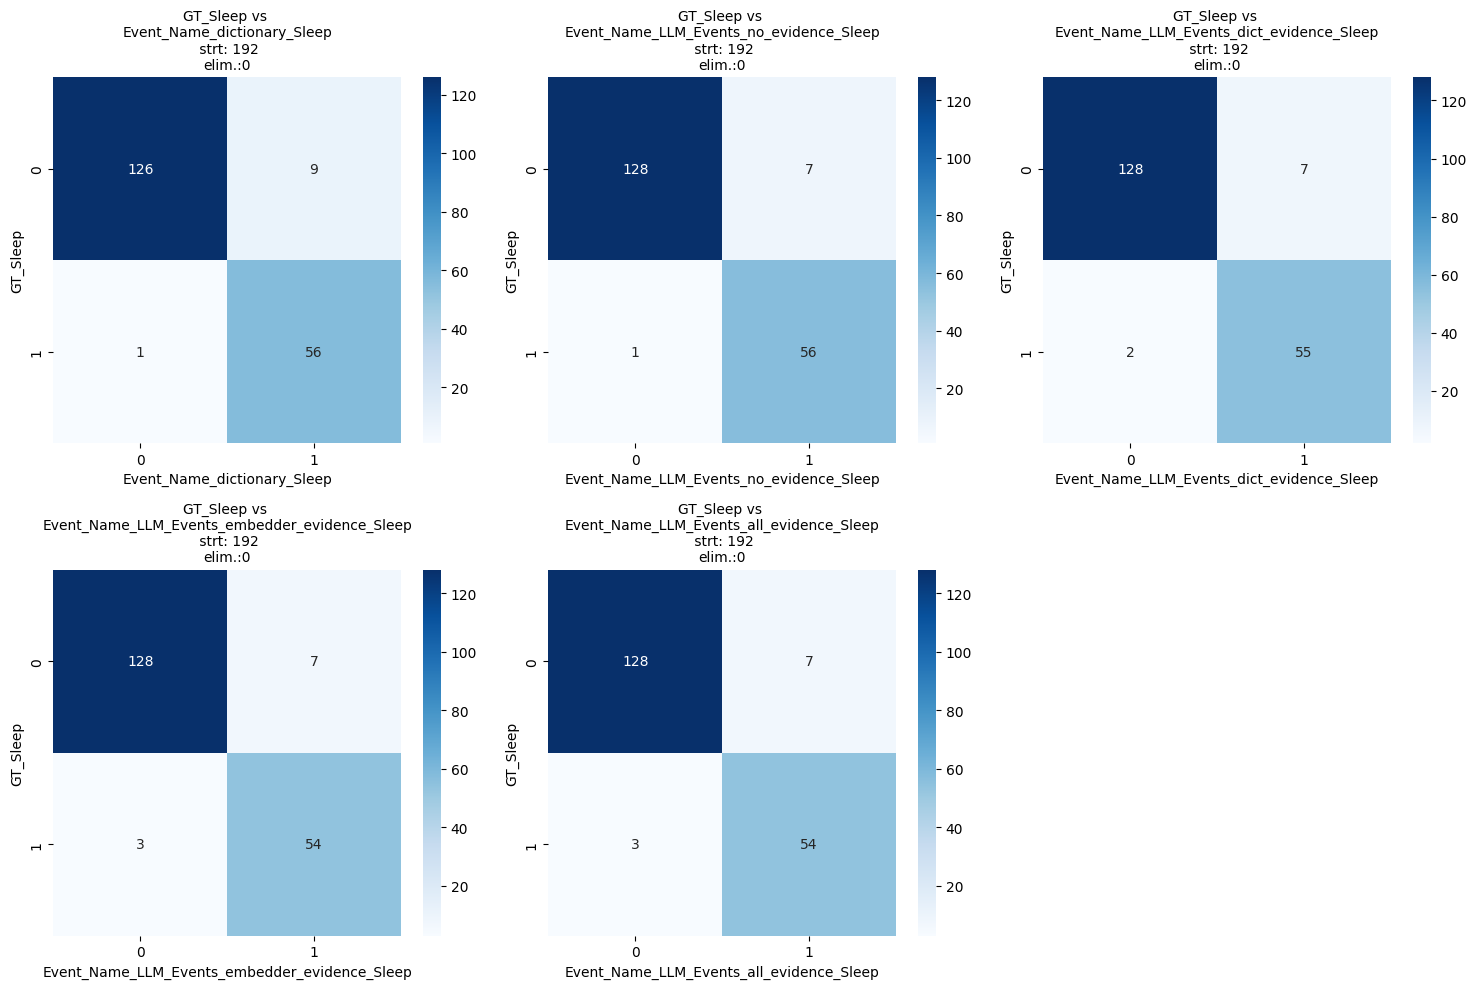

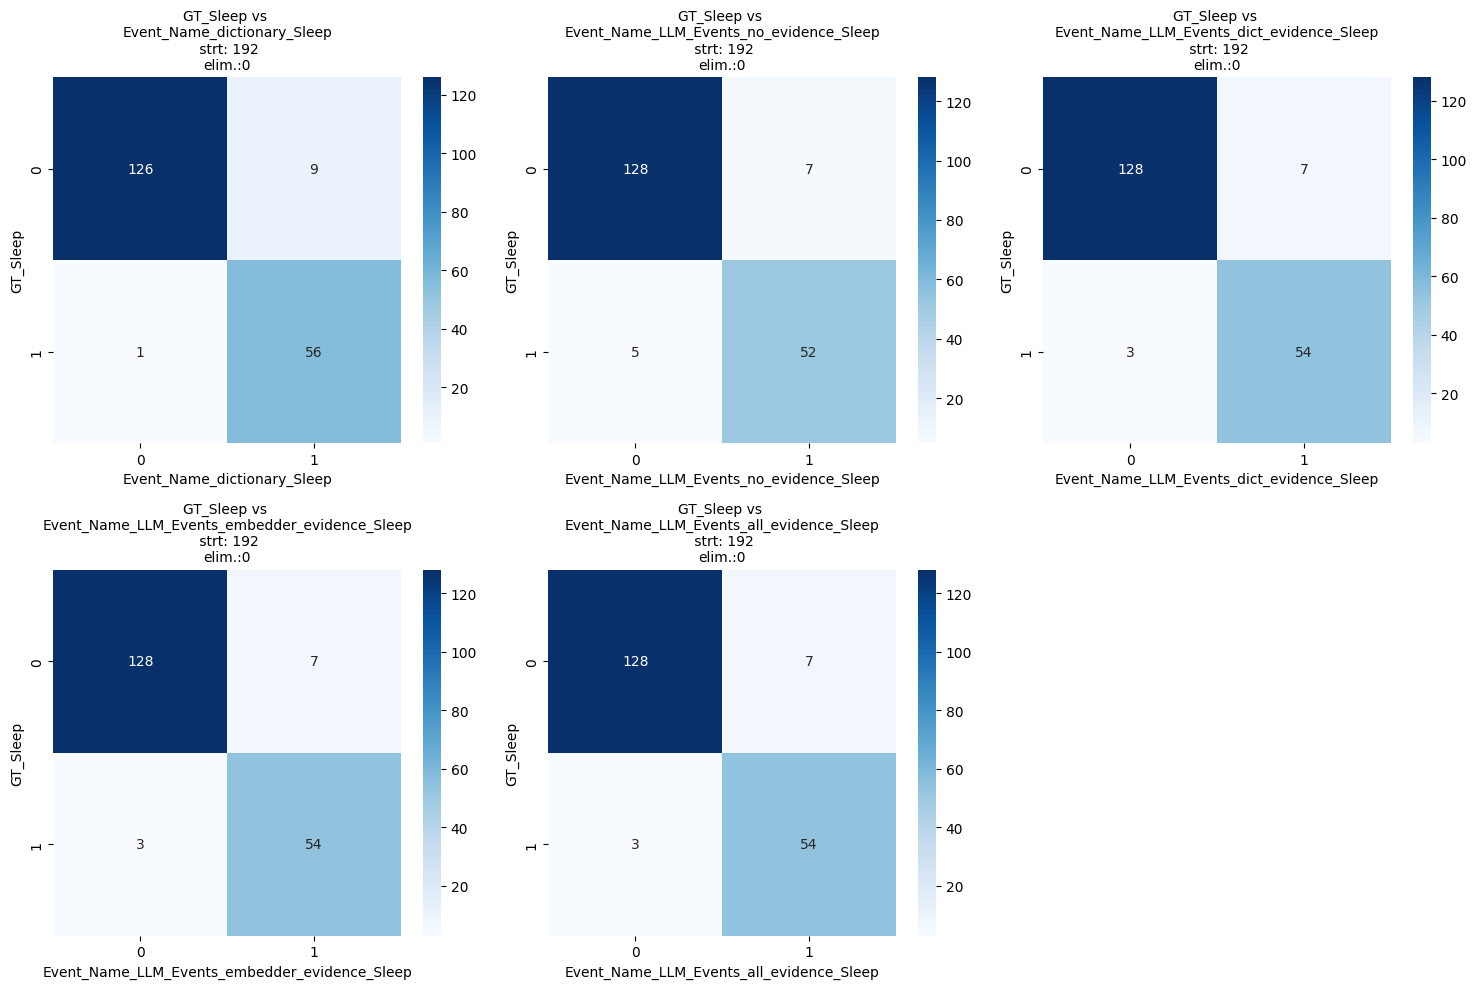

In [ ]:
from glob import glob
import os
import pandas as pd
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 # "agreement" , "disagreement", "mixed", "all"

def get_time(x):
    x = np.array(x)
    # Remove NaNs
    x = x[~np.isnan(x)]
    # If less than 3 values, just return mean
    if len(x) < 3:
        return np.mean(x)
    # Remove outliers using IQR
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    mask = (x >= q1 - 1.5 * iqr) & (x <= q3 + 1.5 * iqr)
    return np.mean(x[mask])

def get_event(x):
    if x["event"] != "Unknown":
        return x["event"]
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "event_type" in fields:
                x["event"] = parsed.get("event_type")
            elif "event type" in fields:
                x["event"] = parsed.get("event type")
            elif len(common_to_labels) > 0:
                x["event"] = list(common_to_labels)
            else:
                x["event"] = "Unknown"
        else:
            x["event"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["event"] = "Unknown"
    return x["event"]

def fixnames(ls,suffix,remove):
    LS=[]
    for s in ls:
        s = s.replace("_dict_evidence","_Ki").replace("_embedder_evidence","_Si").replace("_no_evidence","").replace("_all_evidence","KiSi").replace("Event_Name_",'').replace("_Events",'_').replace('_'+remove,"")
        LS.append(s+suffix)
    return LS

def get_keyword(x, event_type):
    x = x.copy()  # avoid modifying original
    try:
        raw = x.get("raw_output", "")
        if isinstance(raw, str):
            parsed = json.loads(raw)
            fields = parsed.keys()
            common_to_labels = set(fields).intersection(set(["Unknown", "Eating", "Sleep", "Excretion", "Family", "Pain"])) 
            if "keyword" in fields:
                x["keyword"] = parsed.get("keyword")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif "keywords" in fields:
                x["keyword"] = parsed.get("keywords")
                if type(x["keyword"]) == dict:
                    if event_type in x["keyword"]:
                        x["keyword"] = x["keyword"][event_type]
                    else:
                        x["keyword"] = "Unknown"
            elif event_type in fields:
                x["keyword"] = parsed.get(event_type)
            else:
                x["keyword"] = "Unknown"
        else:
            x["keyword"] = "Unknown"
    except (json.JSONDecodeError, TypeError):
        x["keyword"] = "Unknown"
    return x["keyword"]

LLM_dict = {}
df_both = pd.read_pickle("../exports/dictionary_biolord_features.pkl")
# for analysis_type in ["mixed", "agreement", "disagreement", "all"]:
#     for ET in ["Sleep","Excretion"]:
for analysis_type in ["mixed"]:
    for ET in ["Sleep"]:
        print(f"********************{ET}************************")
        disag_uid = result_dict[ET]['disagreement_uid']
        agg_uid = result_dict[ET]['agreement_uid']
        mixed_uid = result_dict[ET]['mixed_uid']
        llm_files = glob(f"../exports/llm/{ET}/*.pkl")
        gt_file = glob(f"../exports/groundtruth/Annotated/{ET}*.xlsx")[0]
        gt_df = pd.read_excel(gt_file)
        gt_df = gt_df.dropna(subset=f"gt_{ET}")
        llm_models = ['LLM_Events_no_evidence','LLM_Events_dict_evidence','LLM_Events_embedder_evidence','LLM_Events_all_evidence']
        # gt_df = gt_df.groupby("UID")[f"gt_{ET}"].agg(lambda x: max(x)).reset_index()
        gt_df = gt_df.groupby("UID")[[f"{ET}_similarity", f"gt_{ET}", "is_keyword_present", "Sentence_dictionary","Lemma","HADM_ID"]].agg(lambda x: max(x) if len(set(x))>1 else set(x).pop()).reset_index()
        uid_to_gt = {row['UID']:row[f"gt_{ET}"] for _,row in gt_df.iterrows()}
        uid_to_key_present = {row['UID']:row[f"is_keyword_present"] for _,row in gt_df.iterrows()}
        uid_to_lemma = {row['UID']:row[f"Lemma"] for _,row in gt_df.iterrows()}
        uid_to_hadmid = {row['UID']:row[f"HADM_ID"] for _,row in gt_df.iterrows()}
        uid_to_dict_time = {row['UID']:row[f"Time_dictionary"] for _,row in df_both.iterrows()}
        output_folder = f"../exports/disagreements/{ET}"
        os.makedirs(output_folder,exist_ok=True)
        for file in llm_files:
            filename = os.path.basename(file).rstrip('.pkl')
            print(filename)
            _,keyword_requested,_,phrase_requested = filename.split("_")[-4:]
            keyword_requested = eval(keyword_requested)
            # if keyword_requested == False:
            #     print("keyword not requested")
            #     continue
            phrase_requested = eval(phrase_requested)
            suffix = "Ko" if keyword_requested else "" 
            suffix = suffix + ("Qo" if phrase_requested else "")
            
            print(suffix,keyword_requested,phrase_requested,filename)
            
            df = pd.read_pickle(file)
            df[f'dictionary_{ET}_time'] = df["UID"].apply(lambda x:uid_to_dict_time.get(x))
            if analysis_type == "disagreement":
                df = df[df.UID.isin(disag_uid)]
            elif analysis_type =="agreement":
                df = df[df.UID.isin(agg_uid)]
            elif analysis_type =="mixed":
                df = df[df.UID.isin(mixed_uid)]
            elif analysis_type == "all":
                df=df.copy()
            df[f"{ET}_similarity"] = df['Similarity'].apply(lambda x: x[ET])
            df["Keyword_dictionary"] = df["Keyword"]
            df["focus_event"] = ET
            df[f"GT_{ET}"] = df["UID"].apply(lambda x:uid_to_gt.get(x))
            df[f"is_keyword_present"] = df["UID"].apply(lambda x:uid_to_key_present.get(x))
            display(df.is_keyword_present.value_counts())
            
            # cm = confusion_matrix(df[f"is_keyword_present"].astype(int), df[f"GT_{ET}"])
            # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Keyword Absent", "Keyword Present"])
            # disp.plot()
            
            print(df[[f"GT_{ET}","is_keyword_present"]].value_counts())
            
            
            df[f"dict_Lemma"] = df["UID"].apply(lambda x:uid_to_lemma.get(x))
            df[f"HADM_ID"] = df["UID"].apply(lambda x:uid_to_lemma.get(x))
            df.dropna(subset=f"GT_{ET}",inplace=True)
            for col in llm_models:
                df[f"Event_Name_{col}"] = df[col].apply(get_event)
                df[f"Keyword_{col}"] = df[col].apply(lambda x:get_keyword(x,ET))
                df[f"{col}_{ET}_time"] = df[col].apply(lambda x:x['event_detection_time'])
            if len(df) > 1:
                first_row = df.iloc[0]
                splittable_columns = ["Event_Name_dictionary",'Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']
                for model in llm_models:
                    if phrase_requested:
                        df[f'Phrase_{model}'] = df[model].apply(lambda x: x['phrase'])
                disagreement_dfs = []
                generated_columns = []

                for col in splittable_columns:
                    generated_column = f"{col}_{ET}"
                    df[generated_column] = df[col].apply(lambda x: 1 if ET in x else 0)
                    
                    generated_columns.append(generated_column)
                
                f1s, accs, precs, recs, psup, nsup, times = [],[],[],[],[],[],[]
                y_gt = df[f"GT_{ET}"]
                LLM_dict[(keyword_requested,phrase_requested,f"gt_{ET}")] = y_gt
                for col in generated_columns:
                    preds = df[col]
                    LLM_dict[(keyword_requested,phrase_requested,col)] = preds
                    f1s.append(f1_score(y_gt, preds))
                    accs.append(accuracy_score(y_gt, preds))
                    precs.append(precision_score(y_gt, preds, zero_division=0))
                    recs.append(recall_score(y_gt, preds))   
                    psup.append(sum(y_gt))
                    nsup.append(sum(y_gt==0))
                    times.append(get_time(df[f"{col.lstrip('Event_Name_')}_time"]))
                
                # for col in llm_models:
                #     df[f"Event_Name_{col}_str"] = df[f"Event_Name_{col}"].astype(str)
                #     df[f"Keyword_{col}_str"] = df[f"Keyword_{col}"].astype(str)
                #     print("****keyword present and groundtruth is 1")
                #     display(df[df.is_keyword_present & df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                #     print("****keyword present but groundtruth is 0")
                #     display(df[df.is_keyword_present & ~df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                #     print("****keyword absent and groundtruth is 1")
                #     display(df[~df.is_keyword_present & df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                #     print("****keyword absent but groundtruth is 0")
                #     display(df[~df.is_keyword_present & ~df[f"GT_{ET}"]][['dict_Lemma',f'Event_Name_{col}_str',f'Keyword_{col}_str',f"GT_{ET}"]].value_counts(dropna=False).reset_index())
                
                results_df = {"technique":fixnames(generated_columns,suffix,ET), "pos_sup": psup, "neg_sup": nsup, "f1_score":f1s, "precision":precs, "recall":recs, "time":times} 
                results = pd.DataFrame(results_df)   
                plot_confusion_matrices_for_column_pairs(df, f"GT_{ET}",vis_columns=generated_columns)
                op_path = f"{output_folder}/{analysis_type}_{disagreement_type}_{filename}.xlsx"
                df['dict-embedder-status'] = ""
                df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_with)]['dict-embedder-status'] = "TT"
                df[df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_with)]['dict-embedder-status'] = "TF"
                df[~df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]<best_th_without)]['dict-embedder-status'] = "FT"
                df[~df[f"Event_Name_dictionary_{ET}"] & (df[f"{ET}_similarity"]>=best_th_without)]['dict-embedder-status'] = "FT"


                df.to_excel(op_path,index=False)
                print(f"file written to {op_path}")
                display(results)
            



In [ ]:
1-len(df[df.UID.isin(agg_uid)])/len(df), df.is_keyword_present.value_counts(), df.GT_Sleep.value_counts()

In [ ]:

ET='Sleep'
best_th_all = result_dict[ET]['th_all'] 
best_th_with = result_dict[ET]['th_with']
best_th_without = result_dict[ET]['th_without']
    
print(1-len(df[df.UID.isin(agg_uid)])/len(df), df.is_keyword_present.value_counts(), df[F"GT_{ET}"].value_counts(),)  

54+11+119+8, len(df)

In [ ]:
_,keyword_requested,_,phrase_requested = filename.split("_")[-4:]
keyword_requested, phrase_requested

In [ ]:
len(df), df.is_keyword_present.value_counts(), df.GT_Sleep.value_counts()

In [ ]:
df_both = pd.read_pickle("../exports/dictionary_biolord_features.pkl")
df_both.columns

In [ ]:
df = pd.read_pickle(file)
df["LLM_Events_similarity_evidence"].apply(lambda x:x['event_detection_time']).mean()

In [ ]:
len(df[f"GT_{ET}"]), df[f"GT_{ET}"].value_counts(), 112/(112+240)

In [ ]:
LLM_dict.keys()

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import accuracy_score
ET = "Excretion"
# list_models = [(False, False, 'gt_Sleep'), (False, False, 'Event_Name_dictionary_Sleep'), (False, False, 'Event_Name_LLM_Events_no_evidence_Sleep'), (False, False, 'Event_Name_LLM_Events_dict_evidence_Sleep'), (False, False, 'Event_Name_LLM_Events_embedder_evidence_Sleep'), (False, False, 'Event_Name_LLM_Events_all_evidence_Sleep'), (False, True, 'gt_Sleep'), (False, True, 'Event_Name_dictionary_Sleep'), (False, True, 'Event_Name_LLM_Events_no_evidence_Sleep'), (False, True, 'Event_Name_LLM_Events_dict_evidence_Sleep'), (False, True, 'Event_Name_LLM_Events_embedder_evidence_Sleep'), (False, True, 'Event_Name_LLM_Events_all_evidence_Sleep'), (True, False, 'gt_Sleep'), (True, False, 'Event_Name_dictionary_Sleep'), (True, False, 'Event_Name_LLM_Events_no_evidence_Sleep'), (True, False, 'Event_Name_LLM_Events_dict_evidence_Sleep'), (True, False, 'Event_Name_LLM_Events_embedder_evidence_Sleep'), (True, False, 'Event_Name_LLM_Events_all_evidence_Sleep'), (True, True, 'gt_Sleep'), (True, True, 'Event_Name_dictionary_Sleep'), (True, True, 'Event_Name_LLM_Events_no_evidence_Sleep'), (True, True, 'Event_Name_LLM_Events_dict_evidence_Sleep'), (True, True, 'Event_Name_LLM_Events_embedder_evidence_Sleep'), (True, True, 'Event_Name_LLM_Events_all_evidence_Sleep')]
list_models = [(False, False, f'gt_{ET}'), (False, False, f'Event_Name_dictionary_{ET}'), 
               (False, False, f'Event_Name_LLM_Events_no_evidence_{ET}'), (False, False, f'Event_Name_LLM_Events_dict_evidence_{ET}'), 
               (True, False, f'Event_Name_LLM_Events_no_evidence_{ET}'), 
               ]

for i in range(len(list_models)):
    for j in range(i + 1, len(list_models)):
        model_A = list_models[i]
        model_B = list_models[j]
        y_true = LLM_dict[(False, False, f'gt_{ET}')]
        y_pred_A = LLM_dict[model_A]
        y_pred_B = LLM_dict[model_B]



        correct_A = [a == t for a, t in zip(y_pred_A, y_true)]
        correct_B = [b == t for b, t in zip(y_pred_B, y_true)]

        b = sum((a == 1 and b == 0) for a, b in zip(correct_A, correct_B))
        c = sum((a == 0 and b == 1) for a, b in zip(correct_A, correct_B))

        table = [[0, b],
                 [c, 0]]

        result = mcnemar(table, exact=True)
        print(f"\nComparing {model_A} vs {model_B}: \n   Contigency Table: {table} \n   p-value = {result.pvalue}")

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    average_precision_score,
    matthews_corrcoef
)

y_true = LLM_dict[(False, False, f'gt_{ET}')]

for model in list_models:
    y_pred = LLM_dict[model]
    
    # Precision, Recall, F1 for positive class (label 1)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    mcc= matthews_corrcoef(y_true, y_pred)
    
    # PR-AUC (if predictions are binary, average_precision_score still works)
    pr_auc = average_precision_score(y_true, y_pred)

    print(f"Model: {model}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1 Score:  {f1:.4f}")
    print(f"   PR-AUC:    {pr_auc:.4f}")
    print(f"   MCC:    {mcc:.4f}")
    print("-" * 40)

results = []

for model in list_models:
    y_pred = LLM_dict[model]
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    pr_auc = average_precision_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)

    results.append((model, precision, recall, f1, pr_auc, mcc))

# Sort by F1 or PR-AUC
sorted_results = sorted(results, key=lambda x: x[5], reverse=True)  # sort by F1

for model, prec, rec, f1, pr, mcc in sorted_results:
    print(f"{model} -> Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, PR-AUC: {pr:.3f}, MCC: {mcc:.3f}")


In [ ]:
len(y_true), y_true.mean(), set(y_true), len(y_pred_A), y_pred_A.mean(), len(y_pred_B), y_pred_B.mean(), 

In [ ]:
df[[i for i in splittable_columns]]

In [ ]:
len(df), len(gt_df)

In [ ]:
ET="Sleep"
gt_df = pd.read_excel(f"/home/asusaiyah/data/tactics_storage/projects/event_log_from_text/exports/groundtruth/Annotated/{ET}_155_233.xlsx")
df_both = pd.read_pickle("../exports/dictionary_biolord_features.pkl")

In [ ]:

event_types = ["Pain", "Sleep", "Excretion", "Eating", "Family"]
vis_columns = ['Event_Name_dictionary','Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']

splittable_columns = ["Event_Name_dictionary",'Event_Name_LLM_Events_no_evidence','Event_Name_LLM_Events_dict_evidence','Event_Name_LLM_Events_embedder_evidence','Event_Name_LLM_Events_all_evidence']
disagreement_dfs = []
generated_columns = []
for file_name in ["only_event_mention","no_particular_event_mention"]:
    disagreement_df = pd.read_pickle(f"../exports/disagreements/{file_name}.pkl")
    
    if file_name == "only_event_mention":
        disagreement_type = "keyword present but embedder low"
        disagreement_df['disagreement_type'] = disagreement_type
        disagreement_df['present/absent_keyword_type'] = disagreement_df["Event_Name_dictionary"].apply(lambda x: set(x).pop())
    elif file_name == "no_particular_event_mention":
        disagreement_type = "keyword absent but embedder high"
        disagreement_df['disagreement_type'] = disagreement_type
        disagreement_df['present/absent_keyword_type'] = disagreement_df.apply(lambda row: [i for i in event_types if (i not in row['Event_Name_dictionary'] and row['Similarity'][i]>=0.2)], axis=1)
    if len(disagreement_df)<=1:
        continue
    print(file_name)
    for col in vis_columns:
        disagreement_df[col] = disagreement_df[col].apply(lambda x: "_".join(tuple(set(x))) if type(x)==list else x)
        disagreement_df[f"{col}_multi"] = disagreement_df[col].apply(lambda x: {i: x.count(i) if isinstance(x, list) else 0 for i in event_types})
        print(disagreement_df[f"{col}_multi"])
    for event_type in event_types:
        for col in splittable_columns:
            generated_column = f"{col}_{event_type}"
            disagreement_df[generated_column] = disagreement_df[col].apply(lambda x: 1 if event_type in x else 0)
            generated_columns.append(generated_column)
    disagreement_df['Similarity'] = disagreement_df['Similarity'].apply(lambda x: {k:f"{v:0.2f}" for k,v in x.items()})
    disagreement_df.to_excel(f"../exports/disagreements/{file_name}.xlsx")
    disagreement_dfs.append(disagreement_df)
    # Store results in a DataFrame
    # cohenskappa_results_df = get_cohens_kappa(disagreement_df,vis_columns, remove_multi=True)
    # cohenskappa_results_df.to_excel(f"../exports/disagreements/{file_name}_cohenskappa.xlsx")
    
    # chisquare_results_df = get_chisquare(disagreement_df,vis_columns)
    # chisquare_results_df.to_excel(f"../exports/disagreements/{file_name}_chisquare.xlsx")
    
    # plot_confusion_matrices_for_column_pairs(disagreement_df,vis_columns).savefig(f"../exports/disagreements/{file_name}_cms.png")
DISAGREEMENT_DF = pd.concat(disagreement_dfs, ignore_index=True)
DISAGREEMENT_DF.Keyword = DISAGREEMENT_DF.Keyword.apply(lambda x: tuple(x))
DISAGREEMENT_DF = DISAGREEMENT_DF.drop_duplicates(subset=['ROW_ID', 'Sent_ID','Keyword', 'Sentence_dictionary','disagreement_type'])
DISAGREEMENT_DF=DISAGREEMENT_DF.explode('present/absent_keyword_type')
keep_columns = ['ROW_ID', 'Sent_ID','Keyword', 'Sentence_dictionary','present/absent_keyword_type','disagreement_type','Event_Name_dictionary',"Similarity"] + generated_columns
DISAGREEMENT_DF[keep_columns].to_excel(f"../exports/disagreements/all_disagreements.xlsx",index=False)


In [ ]:
DISAGREEMENT_DF[DISAGREEMENT_DF.Similarity.apply(lambda x: True if any([v=="0.20" for v in x.values()]) else False)]['disagreement_type'].value_counts()

In [ ]:
from typing import Counter
import pandas as pd
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
import json

def get_lemma_data():
    with open("../resources/lemma.en.txt", "r", encoding="utf-8") as file:
        lines = file.readlines()
    lemma_data = []
    for line in lines:
        lemma_part, forms_part = line.strip().split(" -> ")
        lemma = lemma_part.split("/")[0]  # Remove frequency
        all_forms = forms_part.split(",") + [lemma]
        lemma_data.append({"lemma": lemma, "all_forms": all_forms})
    lemma_data = pd.DataFrame(lemma_data)
    return lemma_data

# Download required resources (only needed once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')  # for lemmatizer to work well

lemma_data = get_lemma_data()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import nltk
from nltk.corpus import stopwords

# Download stopwords list (only once)
nltk.download('stopwords')

# Get English stop words set for fast lookup
stop_words = set(stopwords.words('english'))


def unravel(x):
    if "{" in x: 
        x= eval(x).values()  
        if type(x) == tuple and type(x[0]) == dict:
            x[0] = x[0].values()
    return x

def get_word_counts(x):
    x = str(list(x) if type(x)!=str else x)
    x = ''.join([ch for ch in x if ch.isalpha() or ch == ',' or ch.isspace()])
    x = x.replace(',','')
    x = x.replace('Unknown','')
    return x


def get_lemma(token):
    global lemma_data
    searched_lemma = lemma_data[lemma_data["all_forms"].apply(lambda x: token in x)]['lemma']
    if len(searched_lemma) > 0:
        return searched_lemma.iloc[0]
    else:
        return token


def value_count_words(x, n=2):
    global lemma_data
    ngrams = []

    for sentence in x:
        if isinstance(sentence, str):
            tokens = word_tokenize(sentence.lower())
            lemmas = [get_lemma(token) for token in tokens]
            
            # Build n-grams
            if len(lemmas) >= n:
                ngram_tuples = zip(*[lemmas[i:] for i in range(n)])
                ngram_strings = [' '.join(gram) for gram in ngram_tuples]
                ngrams.extend(ngram_strings)

    return Counter(ngrams)


for ET in ["Sleep","Excretion"]:
    for dtype in ["agreement", "disagreement", "all", "mixed"]:
        dfs = pd.read_excel(glob(f"../exports/disagreements/{ET}/{dtype}_correct_{ET}_*_kw_False_phrase_False.xlsx")[0])
        dfgs = dfs.groupby(["is_keyword_present",f"GT_{ET}",'dict-embedder-status',f"Event_Name_LLM_Events_no_evidence_{ET}",f"Event_Name_LLM_Events_dict_evidence_{ET}"])['Sentence_dictionary'].agg(lambda x:list(x)).reset_index()
        dfgs['count'] = dfgs.Sentence_dictionary.apply(len)
        dfgs.to_excel(f"../exports/paper/{ET}_{dtype}_llm_basic.xlsx")

        dft = pd.read_excel(glob(f"../exports/disagreements/{ET}/{dtype}_correct_{ET}_*_kw_True_phrase_False.xlsx")[0])
        dft['base_llm_no_evidence'] = dfs[f'Event_Name_LLM_Events_no_evidence_{ET}']
        dfgt = dft.groupby(["is_keyword_present",f"GT_{ET}",'dict-embedder-status',"base_llm_no_evidence",f"Event_Name_LLM_Events_no_evidence_{ET}"])[['Sentence_dictionary','Keyword_LLM_Events_no_evidence']].agg(lambda x:list(x)).reset_index()
        dfgt['count'] = dfgt.Sentence_dictionary.apply(len)
        dfgt.to_excel(f"../exports/paper/{ET}_{dtype}_llm_basic_evidence.xlsx")


        dictionary = pd.read_excel("../resources/keyword_dict_annotated_expanded.xlsx")
        dft['keyword_best_llm'] = dft["Keyword_LLM_Events_no_evidence"].apply(lambda x: unravel(x))
        df_sel2 = dft[dft[f"Event_Name_LLM_Events_no_evidence_{ET}"]==1]

        val_c_1 = value_count_words(df_sel2['keyword_best_llm'].apply(get_word_counts).tolist(),1)
        val_c_1 = {k: v for k, v in sorted(val_c_1.items(), key=lambda item: item[1], reverse=True) if k.lower() not in stop_words}
        val_c_1 = {k:v for (k,v) in val_c_1.items() if k not in dictionary['form'].tolist()}

        val_c_2 = value_count_words(df_sel2['keyword_best_llm'].apply(get_word_counts).tolist(),2)
        val_c_2 = {k: v for k, v in sorted(val_c_2.items(), key=lambda item: item[1], reverse=True) if k.lower() not in stop_words}
        val_c_2 = {k:v for (k,v) in val_c_2.items() if all([jk not in dictionary['form'].tolist() for jk in k.split(' ')]) and not any([i in stop_words for i in k.split(' ')])}

        val_c_3 = value_count_words(df_sel2['keyword_best_llm'].apply(get_word_counts).tolist(),3)
        val_c_3 = {k: v for k, v in sorted(val_c_3.items(), key=lambda item: item[1], reverse=True) if k.lower() not in stop_words}
        val_c_3 = {k:v for (k,v) in val_c_3.items() if all([jk not in dictionary['form'].tolist() for jk in k.split(' ')]) and not any([i in stop_words for i in k.split(' ')])}

        val_c_4 = value_count_words(df_sel2['keyword_best_llm'].apply(get_word_counts).tolist(),4)
        val_c_4 = {k: v for k, v in sorted(val_c_4.items(), key=lambda item: item[1], reverse=True) if k.lower() not in stop_words}
        val_c_4 = {k:v for (k,v) in val_c_4.items() if all([jk not in dictionary['form'].tolist() for jk in k.split(' ')]) and not any([i in stop_words for i in k.split(' ')])}

        print(val_c_1)
        print(val_c_2)
        print(val_c_3)
        print(val_c_4)



        combined_dicts = {
            "ngram_1": val_c_1,
            "ngram_2": val_c_2,
            "ngram_3": val_c_3,
            "ngram_4": val_c_4
        }

        os.makedirs("../exports/keywords_extracted", exist_ok=True)

        # Write to file
        with open(f"../exports/keywords_extracted/{ET}_{dtype}.json", "w") as f:
            json.dump(combined_dicts, f, indent=4)

        print(f"../exports/keywords_extracted/{ET}_{dtype}.json")




